<a href="https://colab.research.google.com/github/Joanne-kendrick/Machine-Learning/blob/main/ml_assignment_joan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##### NALIKKA JOAN DEBORAH
##### 2024/HD05/26060U
##### 2400726060

#### MC7103 MACHINE LEARNING EDA ASSIGNMENT.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
print(X.head)

<bound method NDFrame.head of      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phe

In [ ]:
print(X.shape)

(178, 13)


In [ ]:
print(y.shape)

(178, 1)


In [ ]:
print(X.isnull().sum())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


In [ ]:
print(X.duplicated().sum())

Stats = X.describe()
skewness = X.skew()
kurtosis = X.kurtosis()
print(Stats)
print(skewness)
print(kurtosis)


0
          Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0

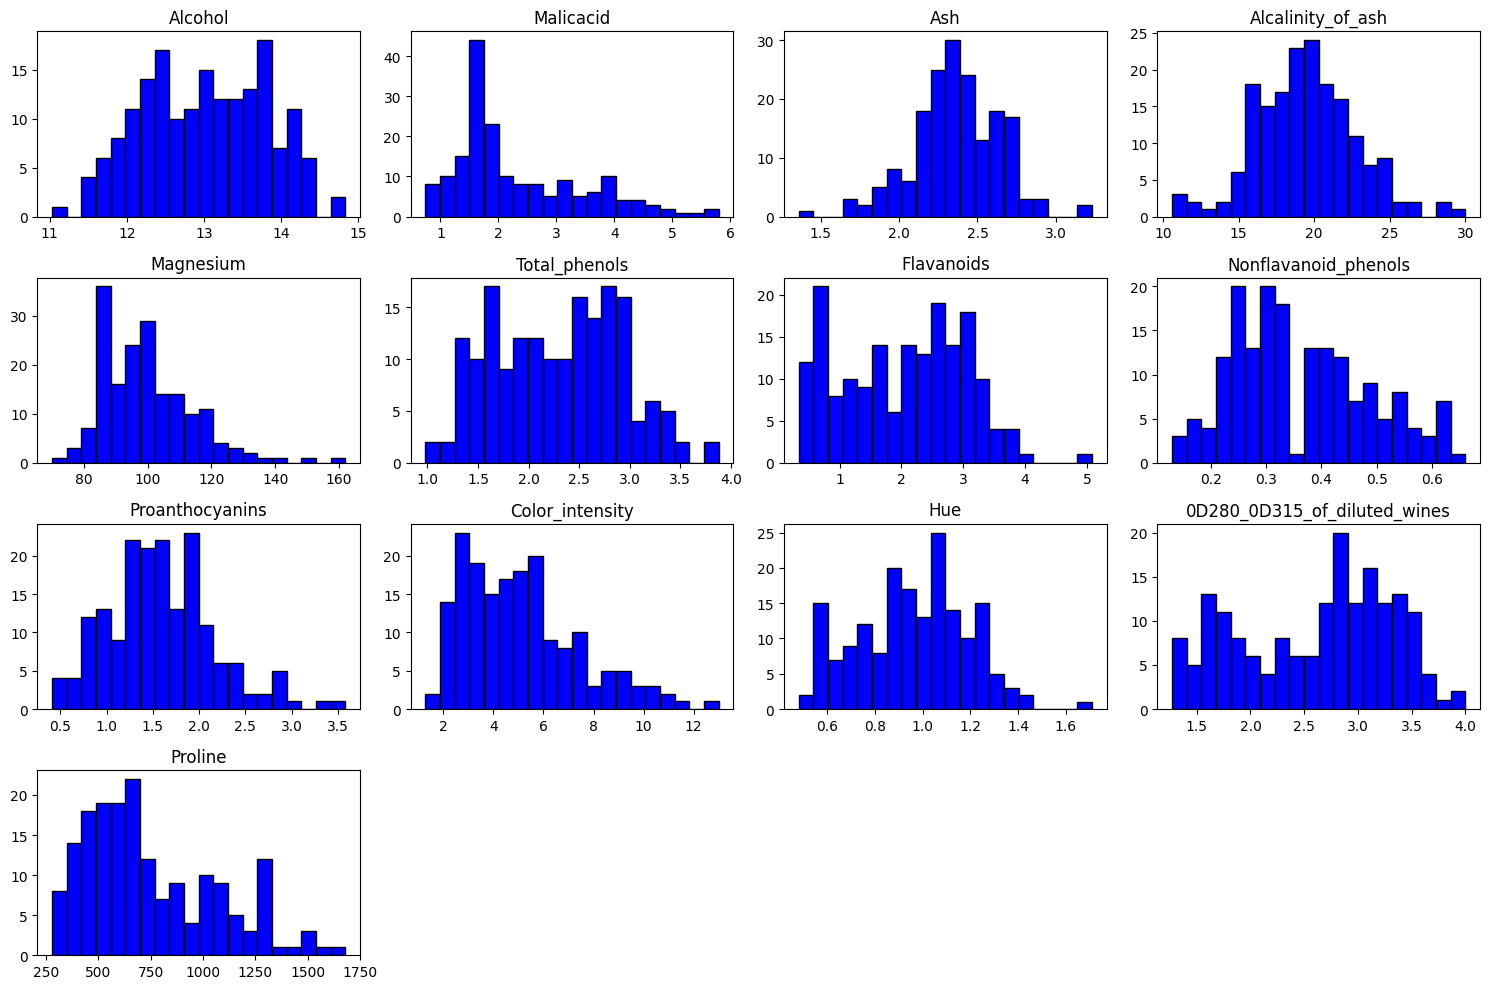

In [ ]:
import matplotlib.pyplot as plt
features = X.columns

# Set up the plotting environment for histograms
plt.figure(figsize=(15, 10))

# Loop through the list of features and create a histogram for each
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)  # Create subplots (4 rows, 4 columns)
    plt.hist(X[feature], bins=20, color='blue', edgecolor='black')  # Plot the histogram
    plt.title(f'{feature}')  # Set the title to the feature name
    plt.tight_layout()  # Adjust layout to prevent overlap of plots
# Show the plot
plt.show()

In [ ]:
import numpy as np

# Define a function to calculate outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for feature in df.columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index.tolist()
    return outliers

# Detect outliers in the wine dataset
outliers = detect_outliers_iqr(X)
print(outliers)


{'Alcohol': [], 'Malicacid': [123, 137, 173], 'Ash': [25, 59, 121], 'Alcalinity_of_ash': [59, 73, 121, 127], 'Magnesium': [69, 73, 78, 95], 'Total_phenols': [], 'Flavanoids': [], 'Nonflavanoid_phenols': [], 'Proanthocyanins': [95, 110], 'Color_intensity': [151, 158, 159, 166], 'Hue': [115], '0D280_0D315_of_diluted_wines': [], 'Proline': []}


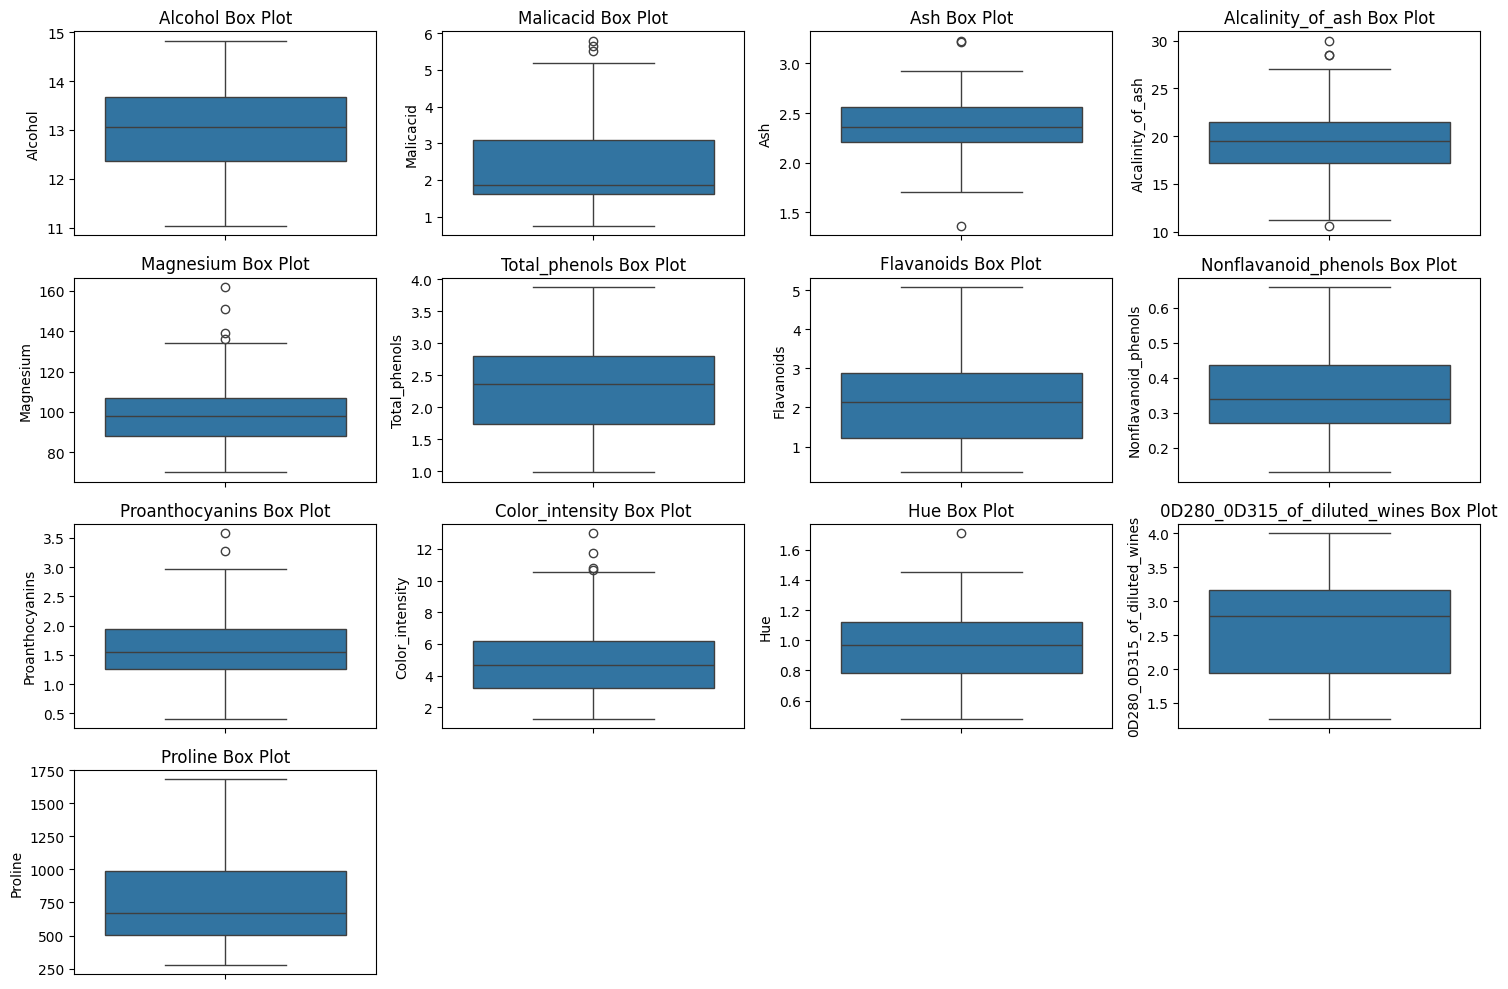

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for all features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(X[feature])
    plt.title(f'{feature} Box Plot')
    plt.tight_layout()
plt.show()

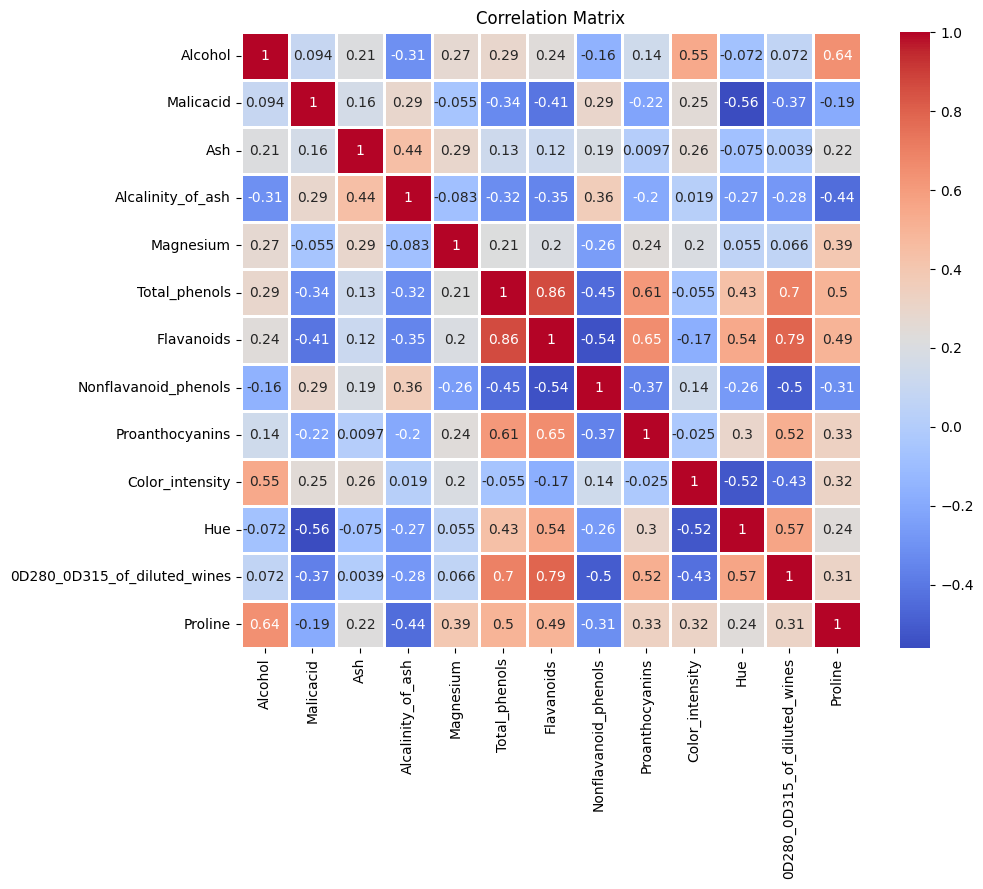

In [ ]:
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import numpy as np

# Define a function to calculate outliers using IQR and cap them
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Make a copy of the original dataset
    for feature in df_capped.columns:
        Q1 = df_capped[feature].quantile(0.25)
        Q3 = df_capped[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers at the lower and upper bounds
        df_capped[feature] = np.where(df_capped[feature] < lower_bound, lower_bound, df_capped[feature])
        df_capped[feature] = np.where(df_capped[feature] > upper_bound, upper_bound, df_capped[feature])

    return df_capped

# Cap outliers in the wine dataset without changing the original
X_capped = cap_outliers_iqr(X)

# Display the capped dataset
print(X_capped)

     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23     1.7100  2.43               15.6      127.0           2.80   
1      13.20     1.7800  2.14               11.2      100.0           2.65   
2      13.16     2.3600  2.67               18.6      101.0           2.80   
3      14.37     1.9500  2.50               16.8      113.0           3.85   
4      13.24     2.5900  2.87               21.0      118.0           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71     5.3025  2.45               20.5       95.0           1.68   
174    13.40     3.9100  2.48               23.0      102.0           1.80   
175    13.27     4.2800  2.26               20.0      120.0           1.59   
176    13.17     2.5900  2.37               20.0      120.0           1.65   
177    14.13     4.1000  2.74               24.5       96.0           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sns.pairplot(X)
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.show()

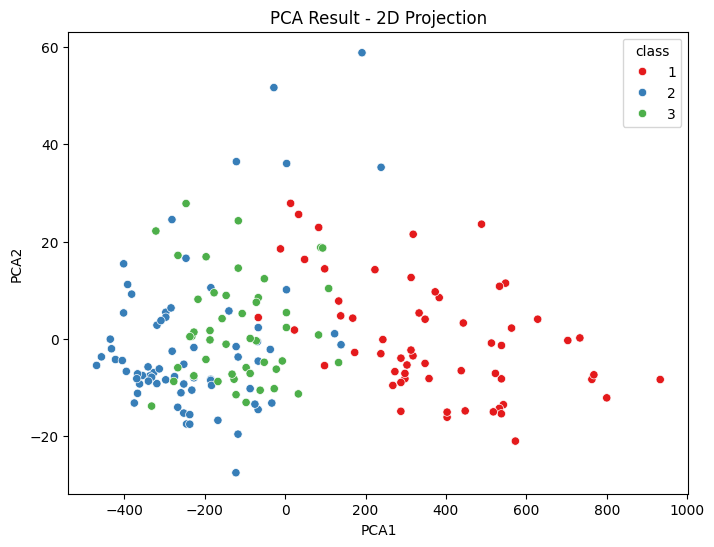

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

X['PCA1'] = pca_result[:, 0]
X['PCA2'] = pca_result[:, 1]
y = y.squeeze() if hasattr(y, 'squeeze') else y.ravel()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['PCA1'], y=X['PCA2'], hue=y, palette='Set1')
plt.title("PCA Result - 2D Projection")
plt.show()

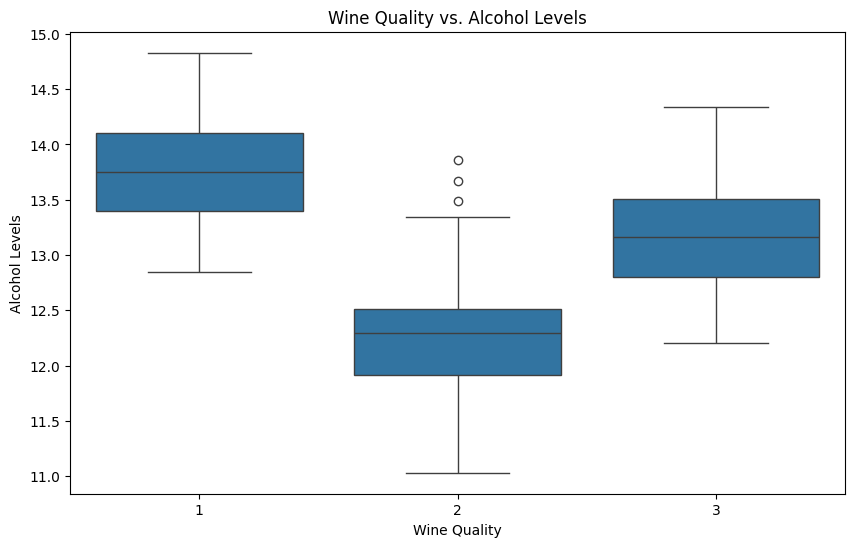

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'quality' is the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=X['Alcohol'])
plt.title('Wine Quality vs. Alcohol Levels')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Levels')
plt.show()


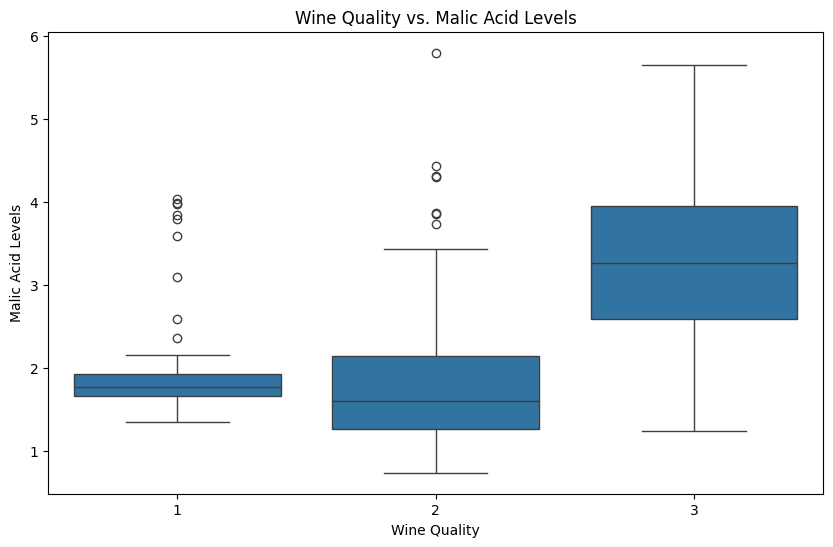

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=X['Malicacid'])
plt.title('Wine Quality vs. Malic Acid Levels')
plt.xlabel('Wine Quality')
plt.ylabel('Malic Acid Levels')
plt.show()
